In [3]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [4]:
base_url = 'https://crashviewer.nhtsa.dot.gov/CrashAPI'
start_year = 2019
end_year = 2020
states = range(1,51)
data = []

In [201]:
# Looked at severity counts. Doesn't give nearly as much information as other methods
#severity_url = f'/analytics/GetInjurySeverityCounts?fromCaseYear={start_year}&toCaseYear={end_year}&state={state}&format=json'
for state in states:
    location_url = f'/crashes/GetCrashesByLocation?fromCaseYear={start_year}&toCaseYear={end_year}&state={state}&county=10&format=json'
    url = base_url + location_url
    data.append(requests.get(url).json())
df = pd.DataFrame(data)
#Goes by state and county. No error message when you enter a county that doesn't exist (Considered for loop prior to this)
df['Results']

,Count,Message,Results,SearchCriteria
0,9,Results returned successfully,"[[{'CITY': '0', 'CITYNAME': 'NOT APPLICABLE', ...",FromYear: 2019 | ToYear: 2020 | State: 1 | Cou...
1,0,No data found,[[]],FromYear: 2019 | ToYear: 2020 | State: 2 | Cou...
2,0,No data found,[[]],FromYear: 2019 | ToYear: 2020 | State: 3 | Cou...
3,27,Results returned successfully,"[[{'CITY': '495', 'CITYNAME': 'TEEC NOS POS', ...",FromYear: 2019 | ToYear: 2020 | State: 4 | Cou...
4,3,Results returned successfully,"[[{'CITY': '0', 'CITYNAME': 'NOT APPLICABLE', ...",FromYear: 2019 | ToYear: 2020 | State: 5 | Cou...
5,86,Results returned successfully,"[[{'CITY': '0', 'CITYNAME': 'NOT APPLICABLE', ...",FromYear: 2019 | ToYear: 2020 | State: 6 | Cou...
6,0,No data found,[[]],FromYear: 2019 | ToYear: 2020 | State: 7 | Cou...
7,63,Results returned successfully,"[[{'CITY': '434', 'CITYNAME': 'COMMERCE CITY',...",FromYear: 2019 | ToYear: 2020 | State: 8 | Cou...
8,28,Results returned successfully,"[[{'CITY': '80', 'CITYNAME': 'BRIDGEPORT', 'CO...",FromYear: 2019 | ToYear: 2020 | State: 9 | Cou...
9,21,Results returned successfully,"[[{'CITY': '0', 'CITYNAME': 'NOT APPLICABLE', ...",FromYear: 2019 | ToYear: 2020 | State: 10 | Co...


In [208]:
len(df['Results'])

50

In [5]:
year_url = '/FARSData/GetFARSData?dataset=Accident&caseYear=2019&format=json'
url = base_url + year_url
data_2019 = requests.get(url).json()
fatal_df = pd.DataFrame(data_2019['Results'][0])

In [6]:
fatal_df

,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,CF1,CF1NAME,CF2,CF2NAME,CF3,CF3NAME,...,VE_TOTAL,WEATHER,WEATHER1,WEATHER1NAME,WEATHER2,WEATHER2NAME,WEATHERNAME,WRK_ZONE,WRK_ZONENAME,YEAR
0,13,1:00pm-1:59pm,9,9,0,None,0,None,0,None,...,2,1,1,Clear,0,No Additional Atmospheric Conditions,Clear,0,None,2019
1,18,6:00pm-6:59pm,7,7,0,None,0,None,0,None,...,2,2,2,Rain,0,No Additional Atmospheric Conditions,Rain,0,None,2019
2,19,7:00pm-7:59pm,12,12,14,"Motor Vehicle struck by falling cargo,or somet...",0,None,0,None,...,3,10,10,Cloudy,0,No Additional Atmospheric Conditions,Cloudy,0,None,2019
3,3,3:00am-3:59am,11,11,0,None,0,None,0,None,...,1,1,1,Clear,0,No Additional Atmospheric Conditions,Clear,0,None,2019
4,6,6:00am-6:59am,0,0,0,None,0,None,0,None,...,1,5,5,"Fog, Smog, Smoke",0,No Additional Atmospheric Conditions,"Fog, Smog, Smoke",0,None,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33514,18,6:00pm-6:59pm,50,50,0,None,0,None,0,None,...,1,6,6,Severe Crosswinds,0,No Additional Atmospheric Conditions,Severe Crosswinds,0,None,2019
33515,13,1:00pm-1:59pm,24,24,0,None,0,None,0,None,...,5,1,1,Clear,0,No Additional Atmospheric Conditions,Clear,0,None,2019
33516,15,3:00pm-3:59pm,48,48,0,None,0,None,0,None,...,1,1,1,Clear,0,No Additional Atmospheric Conditions,Clear,0,None,2019
33517,5,5:00am-5:59am,4,4,0,None,0,None,0,None,...,1,1,1,Clear,0,No Additional Atmospheric Conditions,Clear,4,"Work Zone, Type Unknown",2019


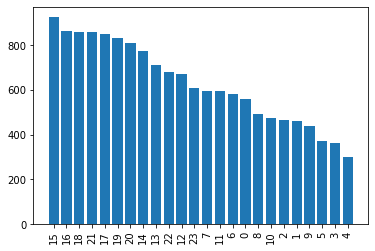

In [237]:
fatal_df.ARR_HOUR.value_counts().keys()
fatal_time = fatal_df[fatal_df.ARR_HOUR != '99']
fatal_time = fatal_time[fatal_time.ARR_HOUR != '88']
plt.bar(fatal_time.ARR_HOUR.value_counts().keys(),fatal_time.ARR_HOUR.value_counts().values)
plt.xticks(rotation = 'vertical')
plt.show()

In [20]:
fatal_df.STATENAME.value_counts()

California              3316
Texas                   3289
Florida                 2950
Georgia                 1374
North Carolina          1275
Tennessee               1040
Ohio                    1039
Pennsylvania             990
Illinois                 935
South Carolina           922
Michigan                 902
Arizona                  889
New York                 869
Alabama                  856
Missouri                 818
Virginia                 771
Indiana                  750
Louisiana                681
Kentucky                 667
Oklahoma                 584
Mississippi              581
Colorado                 544
Wisconsin                526
New Jersey               524
Washington               491
Maryland                 484
Arkansas                 467
Oregon                   450
New Mexico               368
Kansas                   362
Minnesota                333
Massachusetts            314
Iowa                     313
Nevada                   285
West Virginia 

In [33]:
fatal_df.TWAY_ID.value_counts()

I-10                         296
I-95                         200
I-40                         194
I-75                         167
US-1                         162
                            ... 
NATURAL BRIDGE AVE             1
SSR-2137 OLD OAK RIDGE RD      1
GRAND CONCOURSE                1
FAIRMOUNT AV                   1
SR-0902 MILL RD                1
Name: TWAY_ID, Length: 16125, dtype: int64

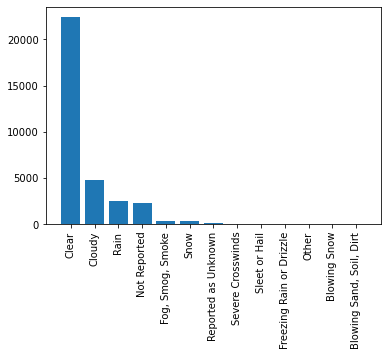

In [213]:
plt.bar(fatal_df.WEATHERNAME.value_counts().keys(),fatal_df.WEATHERNAME.value_counts().values)
plt.xticks(rotation = 'vertical')
plt.show()

In [9]:
fatal_df['LATITUDE'] = fatal_df.LATITUDE.values.astype('float')
fatal_df['LONGITUD'] = fatal_df.LONGITUD.values.astype('float')

In [11]:
len(fatal_df[fatal_df['LATITUDE'] > 90]['LATITUDE'])
print(len(fatal_df))
fatal_df = fatal_df[fatal_df['LATITUDE'] < 90]
print(len(fatal_df))
fatal_df = fatal_df[fatal_df['LONGITUD'] < 180]


33175
33175


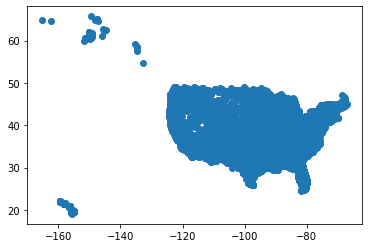

In [12]:
plt.scatter(fatal_df.LONGITUD,fatal_df.LATITUDE)

In [187]:
fatal_df[fatal_df['LONGITUD'] > 90]['STATENAME']
fatal_df = fatal_df[fatal_df['LONGITUD'] < 90]


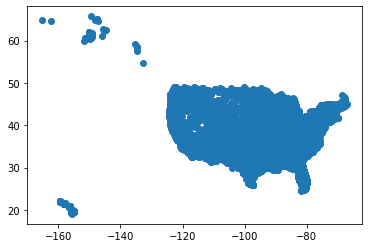

In [189]:
plt.scatter(fatal_df.LONGITUD,fatal_df.LATITUDE)

In [241]:
fatal_df.to_csv('fatal_accidents_2019.csv')